In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
generator_model_path = "C:/Users/allan/PycharmProjects/GANGradientAscent/AutoencoderKS4/Epoch230/Generator.h5"
generator = tf.keras.models.load_model(generator_model_path)
classifier_model_path = "C:/Users/allan/PycharmProjects/FacialAttributeClassifier/EyeGlassesModels/Epoch20.h5"
classifier = tf.keras.models.load_model(classifier_model_path)

In [3]:
#process the generated image
def post_process_generated_image(image_tensor):
    image_tensor = image_tensor*0.5 + 0.5
    image_tensor = tf.squeeze(image_tensor)
    return image_tensor

#Plot image
def plot_image(image_tensor):
    plt.imshow(image_tensor)
    plt.show()

#Update the noise
def update_noise(noise, gradient, weight):
    noise = noise + gradient*weight
    return noise

In [4]:
noise_dimensions = 64

In [10]:
noise = tf.random.normal([1, noise_dimensions])
generated_image = generator(noise)
save_generated_image = generated_image

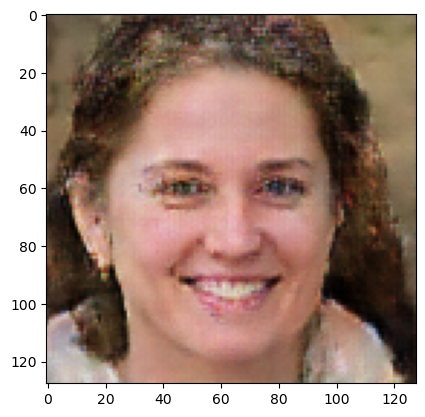

tf.Tensor([[0.01339491]], shape=(1, 1), dtype=float32)


In [11]:
generated_image = post_process_generated_image(generated_image)
plot_image(generated_image)
prediction = classifier(tf.expand_dims(generated_image, axis = 0))
print(prediction)

Step = 1 || classification = [[0.0133949]]
Step = 2 || classification = [[0.02129941]]
Step = 3 || classification = [[0.03715993]]
Step = 4 || classification = [[0.08728149]]
Step = 5 || classification = [[0.8866218]]
Step = 6 || classification = [[0.99956435]]


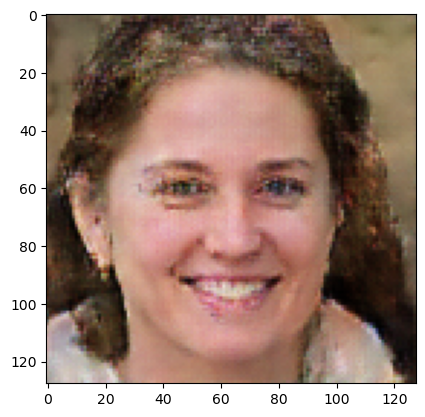

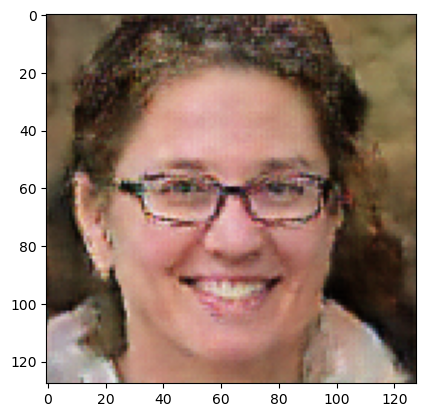

In [12]:
grad_steps = 500
original_noise = noise
#Create the noise
#noise = tf.random.normal([1, noise_dimensions])
    #IN FOR LOOP NUMBER OF STEPS
current_step = 0
while True:
    current_step +=1
    with tf.GradientTape() as tape:
        #Watch the noise
        tape.watch(noise)
        #Generate image from noise
        generated_image = generator(noise)
        #Process the image to be able to input into classifier
        generated_image = generated_image*0.5 + 0.5
        #Classify the generated image
        classification = classifier(generated_image)        
        print("Step = {} || classification = {}".format(current_step, classification))
    #Differentiate classification wrt. to the noise
    gradient = tape.gradient(classification, noise) 
    #Update the noise with the differential and a weight
    noise = update_noise(noise, gradient, weight=0.1)
    if current_step%100 == 0:
        print("Step = {} || classification = {}".format(current_step, classification))
    
    if tf.squeeze(classification) >0.95:
        break
    pass

original_image = generator(original_noise)
original_image = post_process_generated_image(original_image)
plt.imshow(original_image)
plt.show()
new_noise = noise
new_image = generator(new_noise)
new_image = post_process_generated_image(new_image)
plt.imshow(new_image)
plt.show()    